In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from scipy import ndimage

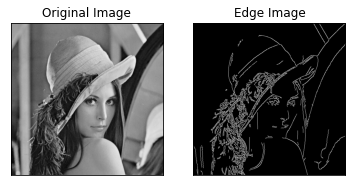

In [2]:
img = cv2.imread('Lenna.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [21]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

kernel=gaussian_kernel(5)
print(kernel)
size=np.size(kernel,0)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


In [26]:
def padding(img, size):

    # Initialise the Padded Matrix
    padded_arr = np.zeros((img.shape[0]+(size*2), img.shape[1]+(size*2)))

    # Fill the padded matrix by original image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+size][j+size] = img[i][j]

    return padded_arr # Return padded array

def convolution2D(img, kernel,size):

    kernel_size = size# Get the size of Kernel

    # Get the no. of Padding with real image matrix
    padding_size = int(kernel_size/2)

    # Initialise the matrix to store the resultant image
    new_img = np.zeros(img.shape, 'float')

    # Padding with real image matrix and get a new padded matrix
    padded_arr = padding(img, padding_size)

    # Compute the reusltant matrix by convolution
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i][j] = np.sum(padded_arr[i:i+kernel_size, j:j+kernel_size]*kernel)

    # should handle kernel of any size but odd values only eg. 5x5, 7x7
    # image is a grayscale image

    filt_image = new_img  # dummy assignment (to be removed)
    return filt_image  # return the resultant matrix

In [27]:
blur=convolution2D(img,gaussian_kernel,size)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap = 'gray')
plt.title('blur Image'), plt.xticks([]), plt.yticks([])

plt.show()

TypeError: unsupported operand type(s) for *: 'float' and 'function'

In [18]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    print(Ix)
    print(Iy)

    G = np.hypot(Ix, Iy)
    print(G.max())
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

img1=sobel_filters(img)[1]
# img1=img1.round()
print(img1)
# plt.imshow(img1,'gray')

[[  0   4   8 ...  64 148  96]
 [  0   4   8 ...  64 148  96]
 [  0   4   8 ...  64 148  96]
 ...
 [  0 230 233 ...   4   2 248]
 [  0 217 226 ... 249 242 242]
 [  0 212 224 ... 244 236 240]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [244 252   9 ...  18  34  48]
 [  0   5  12 ...  11  22  30]
 [  0   0   0 ...   0   0   0]]
360.5
[[0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 ...
 [1.57    0.831   0.0386  ... 1.353   1.512   0.1912 ]
 [0.      0.02304 0.05304 ... 0.04416 0.09064 0.12335]
 [0.      0.      0.      ... 0.      0.      0.     ]]
